In [1]:
import fastai
from fastai.vision.all import *
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,balanced_accuracy_score
import numpy as np

In [3]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sls.head()

,id,kdprov,kdkab,kdkec,kddesa,iddesa,idslsnon,nmslsnon,ketua_sls,jenis,...,j_bstt,j_bsbtt,j_bstt_k,j_bskeko,j_segmen,dom,ldom,j_m_all,j_m_30,klas_ur
0,263884,32,1,10,1,3201010001,100,RT 001 RW 001 DUSUN 1,MUHAMAD RAFLI HIDAYAT,1,...,39,1,2,4,1,1,1,51,51,2
1,263885,32,1,10,1,3201010001,200,RT 002 RW 001 DUSUN 1,NURMAN,1,...,60,2,0,7,1,1,1,62,61,2
2,263886,32,1,10,1,3201010001,300,RT 003 RW 001 DUSUN 1,SAENUDIN,1,...,50,2,0,6,1,1,1,58,57,2
3,263887,32,1,10,1,3201010001,400,RT 004 RW 001 DUSUN 1,AEP,1,...,27,1,0,1,1,1,1,31,31,2
4,263888,32,1,10,1,3201010001,500,RT 005 RW 001 DUSUN 1,JEJEN JAELANI,1,...,49,7,3,8,3,1,1,63,57,2


In [5]:
sls.iddesa.unique().shape

(5957,)

In [4]:
os.chdir('C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop')
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [5]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 60m tc/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop/urban/"+name)
            elif(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop/rural/"+name)
        except Exception:
            print(name)
            pass 

0it [00:00, ?it/s]

32070000002000.jpg
32080000002001.jpg
32080100006001.jpg
32170000006001.jpg


1it [13:53, 833.74s/it]


In [6]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/datasplit_ur_desa.csv")

In [7]:
split_test =split

In [8]:
split_test

,Unnamed: 0,iddesa
0,0,3207250012
1,1,3273111002
2,2,3205260016
3,3,3212030010
4,4,3208181004
...,...,...
590,590,3210070009
591,591,3209040007
592,592,3203051007
593,593,3208030017


### Create test

In [13]:
os.chdir('C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m tc/')
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [14]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop/rural"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m tc/rural/"+name)
        except Exception:
            print(name)
            pass 

1it [00:31, 31.94s/it]


In [15]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop/urban"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m tc/urban/"+name)
        except Exception:
            print(name)
            pass 

1it [01:56, 116.99s/it]


### Run Dataset

In [16]:
path = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/04. Sentinel 60M SLS Truecrop")

In [17]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('rural'),Path('urban')]

In [18]:
fname = (path/"rural").ls()[0]
fname

Path('rural/32010100010001.jpg')

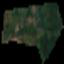

In [19]:
img = Image.open(fname)
img

In [20]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label # extracts the label category from the image's folder name 
                 ) # data augmentation (mult multiplies the default transformation values)

In [21]:
dls = blocks.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


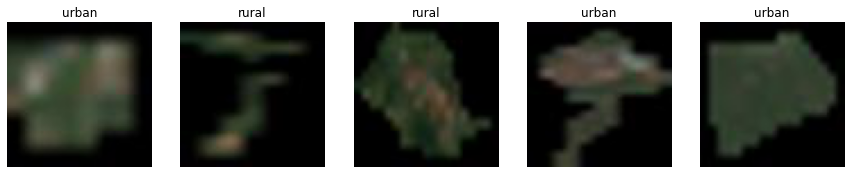

In [22]:
dls.show_batch(nrows=1, ncols=5)

In [23]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

In [24]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.407861,0.391303,0.815333,0.685043,0.722238,0.685043,0.699622,0.832645,17:40
1,0.386494,0.382880,0.819831,0.617254,0.764650,0.617254,0.639535,0.843570,09:12
2,0.376167,0.376152,0.823318,0.651744,0.750071,0.651744,0.676866,0.844670,09:15


In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.400055,0.438473,0.809117,0.569042,0.779494,0.569042,0.571556,0.811201,11:16
1,0.393314,0.400578,0.811897,0.711920,0.717916,0.711920,0.714809,0.836029,11:21
2,0.398129,0.385751,0.821196,0.634650,0.753736,0.634650,0.659251,0.837067,11:13
3,0.389030,0.377891,0.820387,0.619956,0.764261,0.619956,0.642840,0.845480,11:13
4,0.380507,0.374458,0.824279,0.646786,0.756520,0.646786,0.672600,0.846419,11:06


In [27]:
dls.vocab

['rural', 'urban']

In [28]:
dls.train.items[175000]

Path('urban/32731900050057.jpg')

In [29]:
learn.export('C:/Users/jwst2/Python/tesis/models/18042022 D004.pkl')

### Up level

In [30]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])
true_label = []
for i in dls.train.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [31]:
preds,_ = learn.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

In [32]:
pd.value_counts(true_label)

1    140261
0     37828
dtype: int64

In [33]:
df = new_train
df["idsls"] = idx_train 
df["stat"] = round(df[1])
df["iddesa"] = df.idsls.str[:10]
df.head()

,0,1,idsls,stat,iddesa
0,0.458924,0.541076,32053100190023,1.0,3205310019
1,0.386881,0.613119,32061110010013,1.0,3206111001
2,0.009003,0.990997,32091300140021,1.0,3209130014
3,0.191447,0.808553,32091610060002,1.0,3209161006
4,0.182639,0.817361,32062610040007,1.0,3206261004


In [34]:
pd.value_counts(df.stat)

1.0    159350
0.0     18739
Name: stat, dtype: int64

In [35]:
df["true_lab"] = true_label

In [36]:
pd.value_counts(df.true_lab)

1    140261
0     37828
Name: true_lab, dtype: int64

In [37]:
accuracy_score(df.stat.apply(int),df.true_lab.apply(int))

0.8215555143776426

In [38]:
df.head()

,0,1,idsls,stat,iddesa,true_lab
0,0.458924,0.541076,32053100190023,1.0,3205310019,0
1,0.386881,0.613119,32061110010013,1.0,3206111001,0
2,0.009003,0.990997,32091300140021,1.0,3209130014,1
3,0.191447,0.808553,32091610060002,1.0,3209161006,1
4,0.182639,0.817361,32062610040007,1.0,3206261004,0


In [39]:
desa_pred = df.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [40]:
desa_pred.columns = ["pred","true"]

In [41]:
pd.value_counts(df.stat)

1.0    159350
0.0     18739
Name: stat, dtype: int64

In [42]:
for i in np.arange(0.1, 0.95, 0.05):
    value = round(i,2)
    desa_pred["label"+str(value)] = 0
    desa_pred["label"+str(value)][desa_pred.pred > value] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_23224/4109382162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1


In [43]:
desa_pred.head()

,pred,true,label0.1,label0.15,label0.2,label0.25,label0.3,label0.35,label0.4,label0.45,label0.5,label0.55,label0.6,label0.65,label0.7,label0.75,label0.8,label0.85,label0.9
iddesa,,,,,,,,,,,,,,,,,,,
3201010001,0.175439,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3201010002,0.636364,0.0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3201010003,0.575000,1.0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
3201010004,0.808511,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
3201010005,0.758621,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0


In [47]:
for j in range(2,19):
    print("result", desa_pred.columns[j])
    print("accuracy :",  accuracy_score( desa_pred.true,desa_pred.iloc[:,[j]]))
    print("precision :",  precision_score( desa_pred.true,desa_pred.iloc[:,[j]]))

result label0.1
accuracy : 0.7362924281984334
precision : 0.7324744221295946
result label0.15
accuracy : 0.7405818724356583
precision : 0.7364000763504486
result label0.2
accuracy : 0.7461767997016039
precision : 0.741475630899634
result label0.25
accuracy : 0.7536367027228646
precision : 0.7476181217188411
result label0.3
accuracy : 0.7586721372622156
precision : 0.7520564042303173
result label0.35
accuracy : 0.7633345766505035
precision : 0.7568689464321012
result label0.4
accuracy : 0.7704214845207012
precision : 0.76375275055011
result label0.45
accuracy : 0.7771353972398359
precision : 0.7710403569255729
result label0.5
accuracy : 0.782916822081313
precision : 0.7788778877887789
result label0.55
accuracy : 0.7868332711674748
precision : 0.7842687252242854
result label0.6
accuracy : 0.7924281984334204
precision : 0.7919050646323373
result label0.65
accuracy : 0.7965311450951138
precision : 0.7993101961629662
result label0.7
accuracy : 0.7993286087280865
precision : 0.80667838312829

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
pd.value_counts(desa_pred.true)

1.0    3868
0.0    1494
Name: true, dtype: int64

### Test result

In [51]:
path_pred = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m tc")
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]

In [52]:
len(test_files)

22052

In [53]:
test_dl = learn.dls.test_dl(test_files)

In [54]:
preds,_ = learn.get_preds(dl  =test_dl)

In [55]:
str(test_files[1])[-18:-4]

'32011500010002'

In [56]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])
true_label = []
for i in test_files:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [57]:
test = pd.DataFrame(preds)

In [58]:
test["idsls"] = idx_test
test["true_lab"] = true_label

In [59]:
test["iddesa"] = test.idsls.str[:10]
test["stat"] = round(test[1])

In [60]:
test.head()

,0,1,idsls,true_lab,iddesa,stat
0,0.552892,0.447108,32011500010001,0,3201150001,0.0
1,0.793743,0.206257,32011500010002,0,3201150001,0.0
2,0.639128,0.360872,32011500010003,0,3201150001,0.0
3,0.700481,0.299519,32011500010004,0,3201150001,0.0
4,0.608935,0.391065,32011500010005,0,3201150001,0.0


In [61]:
desa_pred_test = test.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [62]:
desa_pred_test

,stat,true_lab
,mean,mean
iddesa,,
3201010010,0.914286,1.0
3201040001,1.000000,1.0
3201040005,1.000000,1.0
3201050012,1.000000,1.0
3201050013,1.000000,1.0
...,...,...
3278050003,1.000000,1.0
3278071005,1.000000,1.0


In [63]:
desa_pred_test.columns = ["pred","true"]

In [73]:
desa_pred_test["pred_lab"] = 0
desa_pred_test["pred_lab"][desa_pred_test.pred > 0.85] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_23224/2136042812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred_test["pred_lab"][desa_pred_test.pred > 0.85] = 1


In [74]:
desa_pred_test

,pred,true,pred_lab
iddesa,,,
3201010010,0.914286,1.0,1
3201040001,1.000000,1.0,1
3201040005,1.000000,1.0,1
3201050012,1.000000,1.0,1
3201050013,1.000000,1.0,1
...,...,...,...
3278050003,1.000000,1.0,1
3278071005,1.000000,1.0,1
3278080002,1.000000,1.0,1


In [75]:
print("accuracy :",  accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("balanced_accuracy_score :",  balanced_accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("precision :",  precision_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("recall :",  recall_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("f1 :",  f1_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("rocauc :",  roc_auc_score( desa_pred_test.true,desa_pred_test.pred_lab))

accuracy : 0.8134453781512605
balanced_accuracy_score : 0.7400468384074941
precision : 0.8434782608695652
recall : 0.9086651053864169
f1 : 0.874859075535513
rocauc : 0.7400468384074942


### Resnet

In [76]:
learn_rs = cnn_learner(dls, resnet50, metrics=metrics) 

In [77]:
learn_rs.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.399786,0.384987,0.821297,0.663250,0.739043,0.663250,0.686055,0.835403,07:28
1,0.386032,0.381475,0.821297,0.683869,0.734192,0.683869,0.702206,0.843700,07:27
2,0.380726,0.375571,0.823167,0.649821,0.750665,0.649821,0.675009,0.845309,07:25


In [72]:
learn_rs.unfreeze()

In [78]:
learn_rs.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.384131,0.377704,0.821095,0.666689,0.737454,0.666689,0.688808,0.843452,07:22
1,0.380759,0.373602,0.822712,0.654144,0.746856,0.654144,0.678786,0.847411,07:16


In [79]:
learn_rs.export('C:/Users/jwst2/Python/tesis/models/19042022 R004.pkl')

In [80]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])
true_label = []
for i in dls.train.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [81]:
preds,_ = learn_rs.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

In [82]:
df = new_train
df["idsls"] = idx_train 
df["stat"] = round(df[1])
df["iddesa"] = df.idsls.str[:10]
df.head()

,0,1,idsls,stat,iddesa
0,0.488102,0.511898,32053100190023,1.0,3205310019
1,0.459063,0.540937,32061110010013,1.0,3206111001
2,0.008010,0.991990,32091300140021,1.0,3209130014
3,0.248663,0.751337,32091610060002,1.0,3209161006
4,0.149500,0.850500,32062610040007,1.0,3206261004


In [83]:
pd.value_counts(df.stat)

1.0    157395
0.0     20694
Name: stat, dtype: int64

In [84]:
df["true_lab"] = true_label

In [85]:
pd.value_counts(df.true_lab)

1    140261
0     37828
Name: true_lab, dtype: int64

In [86]:
accuracy_score(df.stat.apply(int),df.true_lab.apply(int))

0.826648473516051

In [87]:
df.head()

,0,1,idsls,stat,iddesa,true_lab
0,0.488102,0.511898,32053100190023,1.0,3205310019,0
1,0.459063,0.540937,32061110010013,1.0,3206111001,0
2,0.008010,0.991990,32091300140021,1.0,3209130014,1
3,0.248663,0.751337,32091610060002,1.0,3209161006,1
4,0.149500,0.850500,32062610040007,1.0,3206261004,0


In [88]:
desa_pred = df.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [89]:
desa_pred.columns = ["pred","true"]

In [90]:
pd.value_counts(df.stat)

1.0    157395
0.0     20694
Name: stat, dtype: int64

In [91]:
for i in np.arange(0.1, 0.95, 0.025):
    value = round(i,2)
    desa_pred["label"+str(value)] = 0
    desa_pred["label"+str(value)][desa_pred.pred > value] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_23224/935834860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1


In [92]:
desa_pred.head()

,pred,true,label0.1,label0.12,label0.15,label0.18,label0.2,label0.22,label0.25,label0.27,...,label0.7,label0.72,label0.75,label0.77,label0.8,label0.82,label0.85,label0.87,label0.9,label0.92
iddesa,,,,,,,,,,,,,,,,,,,,,
3201010001,0.105263,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3201010002,0.568182,0.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010003,0.625000,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010004,0.787234,0.0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
3201010005,0.724138,1.0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0


In [93]:
for j in range(2,36):
    print("result", desa_pred.columns[j])
    print("accuracy :",  accuracy_score( desa_pred.true,desa_pred.iloc[:,[j]]))
    print("precision :",  precision_score( desa_pred.true,desa_pred.iloc[:,[j]]))

result label0.1
accuracy : 0.7381574039537486
precision : 0.734131508931965
result label0.12
accuracy : 0.7407683700111899
precision : 0.7360899390243902
result label0.15
accuracy : 0.7459903021260723
precision : 0.7403145377828922
result label0.18
accuracy : 0.7495337560611712
precision : 0.7433969539232698
result label0.2
accuracy : 0.7499067512122343
precision : 0.7444379957438576
result label0.22
accuracy : 0.7515852293920179
precision : 0.7458317177200465
result label0.25
accuracy : 0.7566206639313688
precision : 0.7501463985945734
result label0.27
accuracy : 0.7588586348377471
precision : 0.7525004902922141
result label0.3
accuracy : 0.7631480790749721
precision : 0.7565165876777251
result label0.32
accuracy : 0.7651995524058187
precision : 0.7584703784426392
result label0.35
accuracy : 0.7691160014919806
precision : 0.7623703112529928
result label0.37
accuracy : 0.7719134651249534
precision : 0.7654023680513746
result label0.4
accuracy : 0.7784408802685565
precision : 0.77125506

### Test result resnet

In [94]:
path_pred = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m tc")
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]

In [95]:
test_dl = learn_rs.dls.test_dl(test_files)

In [96]:
preds,_ = learn_rs.get_preds(dl  =test_dl)

In [97]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])
true_label = []
for i in test_files:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [98]:
test = pd.DataFrame(preds)

In [99]:
test["idsls"] = idx_test
test["true_lab"] = true_label

In [100]:
test["iddesa"] = test.idsls.str[:10]
test["stat"] = round(test[1])

In [101]:
test.head()

,0,1,idsls,true_lab,iddesa,stat
0,0.663286,0.336714,32011500010001,0,3201150001,0.0
1,0.755952,0.244048,32011500010002,0,3201150001,0.0
2,0.450781,0.549219,32011500010003,0,3201150001,1.0
3,0.632627,0.367373,32011500010004,0,3201150001,0.0
4,0.487844,0.512156,32011500010005,0,3201150001,1.0


In [102]:
desa_pred_test = test.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [103]:
desa_pred_test.columns = ["pred","true"]

In [120]:
desa_pred_test["pred_lab"] = 0
desa_pred_test["pred_lab"][desa_pred_test.pred > 0.8] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_23224/3417576388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred_test["pred_lab"][desa_pred_test.pred > 0.8] = 1


In [121]:
print("accuracy :",  accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("balanced_accuracy_score :",  balanced_accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("precision :",  precision_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("recall :",  recall_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("f1 :",  f1_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("rocauc :",  roc_auc_score( desa_pred_test.true,desa_pred_test.pred_lab))

accuracy : 0.8218487394957983
balanced_accuracy_score : 0.7477068696330991
precision : 0.8466522678185745
recall : 0.9180327868852459
f1 : 0.8808988764044944
rocauc : 0.7477068696330991


In [156]:
accuracy : 0.8117647058823529
balanced_accuracy_score : 0.7623438719750195
precision : 0.8637413394919169
recall : 0.8758782201405152
f1 : 0.8697674418604651
rocauc : 0.7623438719750195